Задана модель векторной авторегресии

$y_t =  
  \begin{bmatrix}
  -0.4 & -0.4 & -0.2 \\
  0.4 & -0.4 & 0.3 \\
  0.1 & 0.3 & 0.2
  \end{bmatrix} y_{t-1} +
  \begin{bmatrix}
  -0.4 & -0.3 & -0.2 \\
  0.2 & -0.3 & 0.2 \\
  0.3 & -0.2 & 0.2
  \end{bmatrix} y_{t-2} + \epsilon_t$

In [ ]:
install.packages("mAr")
library(mAr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS



#Проверка на стационарность

зададим модель вектор констант c
 и матрицы Φ1,Φ2

In [ ]:
Phi1 <- c(-0.4, -0.4, -0.2)
Phi1 <- rbind(Phi1,c(0.4, -0.4 ,0.3))
Phi1 <- rbind(Phi1,c(0.1, 0.3, 0.2))
Phi1

Phi1,-0.4,-0.4,-0.2
,0.4,-0.4,0.3
,0.1,0.3,0.2


In [ ]:
Phi2 <- c(-0.4, -0.3, -0.2)
Phi2 <- rbind(Phi2,c(0.2, -0.3 ,0.2))
Phi2 <- rbind(Phi2,c(0.3, -0.2, 0.2))
Phi2

Phi2,-0.4,-0.3,-0.2
,0.2,-0.3,0.2
,0.3,-0.2,0.2


In [ ]:
Phi <- cbind(Phi1,Phi2)
Phi

Phi1,-0.4,-0.4,-0.2,-0.4,-0.3,-0.2
,0.4,-0.4,0.3,0.2,-0.3,0.2
,0.1,0.3,0.2,0.3,-0.2,0.2


In [ ]:
I <- diag(1,3,3)
Zero <- diag(0,3,3)
IZ <- cbind(I,Zero)
F <- rbind(Phi,IZ)
F

Phi1,-0.4,-0.4,-0.2,-0.4,-0.3,-0.2
,0.4,-0.4,0.3,0.2,-0.3,0.2
,0.1,0.3,0.2,0.3,-0.2,0.2
,1.0,0.0,0.0,0.0,0.0,0.0
,0.0,1.0,0.0,0.0,0.0,0.0
,0.0,0.0,1.0,0.0,0.0,0.0


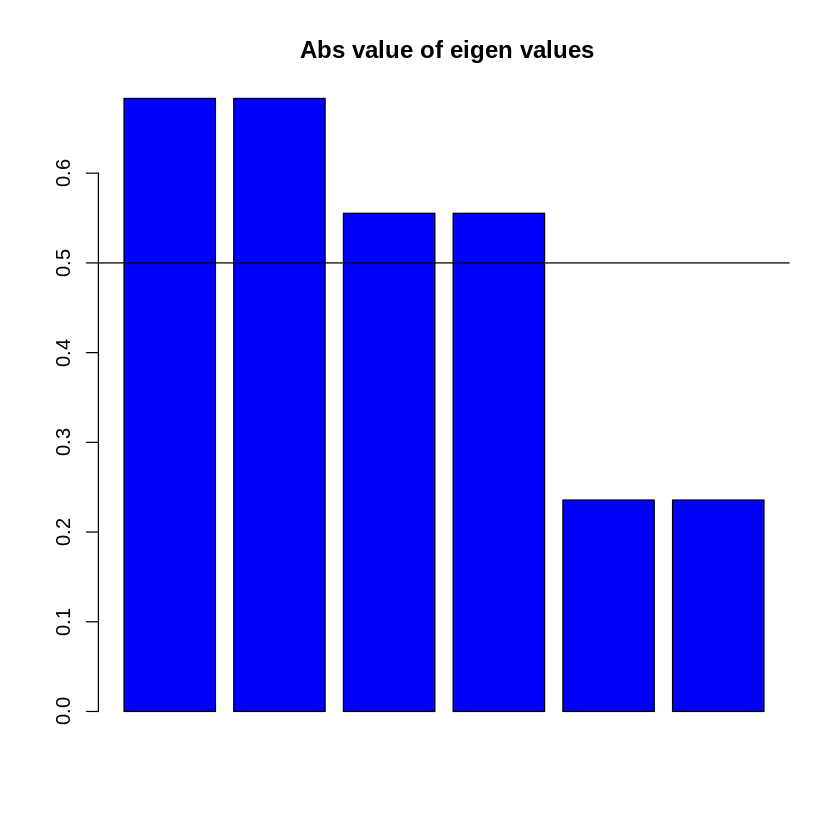

In [ ]:
eval <- eigen(F,only.values= TRUE)
modev <- Mod(eval$values)
barplot(modev,col = "blue",main = " Abs value of eigen values")
abline(h=0.5,col = "black") # 0.5 для наглядности. поменяйте на h = 1.0.

собственные значения матрицы F

In [ ]:
eval

$values
[1] -0.0324460+0.6826122i -0.0324460-0.6826122i -0.4284232+0.3533439i
[4] -0.4284232-0.3533439i  0.1608692+0.1722403i  0.1608692-0.1722403i

$vectors
NULL

модулю <1, следовательно ряд стационарен Моделируем и смотрим результат